# Assignment 2 - Question 3

In [1]:
# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.cluster import KMeans
import random

### Creating dataset

In [2]:
x = []
x1 = []
x2 = []
y = []

In [3]:
x.clear()
x1.clear()
x2.clear()
y.clear()

for i in range(0, 21):
  for j in range(0, 21):
    xi = - 2 + (0.2 * i)
    xj = - 2 + (0.2 * j)

    # Check if datapoint is within the defined range
    if (xi >= -2) and (xi <= 2) and (xj >= -2) and (xj <= 2):
      x1.append(xi)
      x2.append(xj)
      x.append(np.array([xi,xj]))

      yi = (xi**2) + (xj**2)

      if yi <= 1:
        y.append(1)
      else:
        y.append(-1)

In [4]:
x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

(441, 2)
(441,)


In [5]:
# Split dataset into train (80%) and test (20%) 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=81)

**Radial Basis Funtion Network (RBFN)** has a simple architecture and consists of three layers:

* Input layer
* Hidden layer with activation functions
* Output layer

All the weights from the input layer to the hidden layer are equal to 1 and we only need to calculate the weights from the hidden layer to the output layer.

The non-linear transformations in the hidden layer are made possible with the help of kernel nodes. These activations depend on two factors:

* Center
* Width or spread

One of the most widely used kernel function is the Gaussian function. It is given by the following formula:

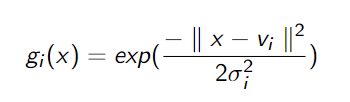

where 

x is the input vector 

vi is the vector denoting the center of the gaussian function 

sigma is the standard deviation or the spread



---

The Gaussian function can also be called the probability density function which helps us to observe any input x given its normal distribution curve.
Further, a combination of Gaussian functions can be used to approximate any given function.

In [6]:
# Define the Gaussian function
def gaussian_distance(r, s):
  '''
  Inputs:
  r - distance between a datapoint and the center of the radial function
  s - Spread parameter

  Output:
    Returns the value of the Gaussian function over the given inputs
  '''

  res = np.exp((-1 * (r ** 2)) / (2 * (s ** 2)))
  return res

* We calculate the Gaussian kernel matrix by using the Gaussian function as the radial basis function and computing each element by the formula given above.

In [7]:
def kernel_matrix(x, c, s, hidden_nodes):
  '''
  Inputs:
  x - The input array of datapoints
  c - Center of the radial function
  s - Spread parameter
  hidden_nodes - Number of nodes in the hidden layer

  Output:
    Returns the kernel matrix for the given set of inputs
  '''

  # initialize the matrix
  G = np.empty((x.shape[0], hidden_nodes), dtype=float)

  # Compute the Gaussian function for each input
  for i in range(x.shape[0]):
    for j in range(hidden_nodes):
      diff = np.linalg.norm(x[i] - c[j])
      res = gaussian_distance(diff, s)
      G[i][j] = res

  return G

* To calculate the weight matrix W, we make use of the following formula:

  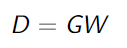
                        
  where D is the output.

  Although to accommodate for the non-square matrix condition, we consider the **pseudo-inverse of matrix G**, instead of the traditional inverse.

  Hence, the equation then becomes

  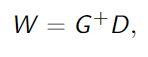 

  where 

  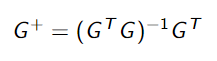

In [8]:
# Calculate the weight matrix
def calculate_weight(G, y):
  '''
  Inputs:
  G - The kernel matrix
  y - Set of target labels

  Output:
    Returns the weight matrix
  '''

  G_ = np.dot(G.T, G)
  G_inv = np.linalg.pinv(G_)
  G_plus = np.dot(G_inv, G.T)
  w = np.dot(G_plus, y)

  return w

In [9]:
# Function to calculate the accuracy
def calculate_accuracy(true, predicted):
  '''
  Inputs:
  true - Set of the true labels
  predicted - Set of the predicted labels

  Output:
    Returns the accuracy score
  '''

  accuracy = accuracy_score(true, predicted)
  return accuracy

In [10]:
# Function to calculate the error
def calculate_error(true, predicted):
  '''
  Inputs:
  true - Set of the true labels
  predicted - Set of the predicted labels

  Output:
    Returns the mean squared error
  '''

  mse = mean_squared_error(true, predicted)
  return mse

In [11]:
# Function to get the predictions on the train and test set
def rbf_net(x, y, s, test_x, centers, hidden_nodes):
  '''
  Inputs:
  x - Set of input datapoints
  y - Set of target labels
  s - Spread parameter
  test_x - Set of test datapoints
  centers - Set of center points for the radial function
  hidden_nodes - Number of nodes in the hidden layer

  Output:
    Returns the predicted set of target labels for train and test sets
  '''

  G = kernel_matrix(x, centers, s, hidden_nodes)
  W = calculate_weight(G, y)
  y_pred_train = np.dot(G, W)

  # Calculate the Gaussian kernel for the test set
  output_G = kernel_matrix(test_x, centers, s, hidden_nodes)
  y_pred_test = np.dot(output_G, W)

  return y_pred_train, y_pred_test

In [12]:
# Define values for spread parameters
spread = [0.001, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.75, 0.8, 0.9, 1, 2.1, 3, 4, 5, 6, 7, 8.5, 9, 10]

train_accuracies = []
test_accuracies = []
train_errors = []
test_errors = []

In [13]:
def select_center(centers, spread, hidden_nodes):
  '''
  Inputs:
  centers - Set of center points for the radial function
  spread - Set of spread parameter values
  hidden_nodes - Number of nodes in the hidden layer
  '''
  
  train_accuracies.clear()
  test_accuracies.clear()
  train_errors.clear()
  test_errors.clear()

  train_acc, test_acc, train_error, test_error = 0, 0, 0, 0

  for s in spread:
    y_pred_train, y_pred_test = rbf_net(X_train, y_train, s, X_test, centers, hidden_nodes)

    # Aligning the predicted outputs to the expected outputs, i.e. the labels -1 and 1
    y_pred_train = np.sign(y_pred_train)
    y_pred_test = np.sign(y_pred_test)

    train_acc = calculate_accuracy(y_train, y_pred_train)
    train_accuracies.append(train_acc)
    test_acc = calculate_accuracy(y_test, y_pred_test)
    test_accuracies.append(test_acc)

    train_err = calculate_error(y_train, y_pred_train)
    train_errors.append(train_err)
    test_err = calculate_error(y_test, y_pred_test)
    test_errors.append(test_err)

    print('Spread: {} \n Train accuracy: {} Train error: {} \n Test accuracy: {} Test error: {}'.format(s, train_acc, train_err, test_acc, test_err))

## Considering all the points of the train set as centers

In [14]:
centers = X_train
select_center(centers, spread, len(X_train))

Spread: 0.001 
 Train accuracy: 1.0 Train error: 0.0 
 Test accuracy: 0.0 Test error: 1.0
Spread: 0.05 
 Train accuracy: 1.0 Train error: 0.0 
 Test accuracy: 0.9550561797752809 Test error: 0.1797752808988764
Spread: 0.1 
 Train accuracy: 1.0 Train error: 0.0 
 Test accuracy: 0.9550561797752809 Test error: 0.1797752808988764
Spread: 0.2 
 Train accuracy: 1.0 Train error: 0.0 
 Test accuracy: 0.9550561797752809 Test error: 0.1797752808988764
Spread: 0.3 
 Train accuracy: 1.0 Train error: 0.0 
 Test accuracy: 0.9213483146067416 Test error: 0.3146067415730337
Spread: 0.4 
 Train accuracy: 1.0 Train error: 0.0 
 Test accuracy: 0.9550561797752809 Test error: 0.1797752808988764
Spread: 0.5 
 Train accuracy: 1.0 Train error: 0.0 
 Test accuracy: 0.9325842696629213 Test error: 0.2696629213483146
Spread: 0.6 
 Train accuracy: 0.9971590909090909 Train error: 0.011363636363636364 
 Test accuracy: 0.9438202247191011 Test error: 0.2247191011235955
Spread: 0.75 
 Train accuracy: 0.9971590909090909 T

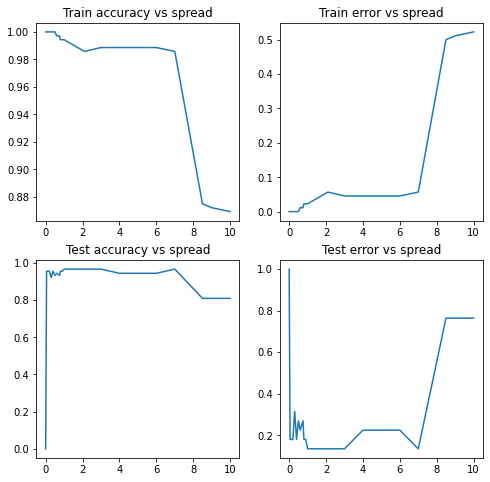

In [15]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.title.set_text('Train accuracy vs spread')
ax2.title.set_text('Train error vs spread')
ax3.title.set_text('Test accuracy vs spread')
ax4.title.set_text('Test error vs spread')
ax1.plot(spread, train_accuracies)
ax2.plot(spread, train_errors)
ax3.plot(spread, test_accuracies)
ax4.plot(spread, test_errors)
plt.show()

* The highest training accuracy is obtained when the spread parameters are smaller than 0.6.
* Consequently, the error is reported to be 0 as well.
* The testing accuracy significantly increases as the spread parameter is increased. However, it dips slightly when the width is 8 and 10.
* In accordance to the testing accuracy, error on the test set decreases in the beginning and then increases as the width approaches 8.
* One of the reason for this to happen is that error increases when the standard deviation increases. The increase in the variance of the population leads to a decrease in the accuracy.

## Randomly select 150 centers from input data

In [16]:
centers = []
for i in range(150):
  index = random.randint(0, X_train.shape[0]-1)
  centers.append(X_train[index])

In [17]:
select_center(centers, spread, 150)

Spread: 0.001 
 Train accuracy: 0.3409090909090909 Train error: 0.6590909090909091 
 Test accuracy: 0.0 Test error: 1.0
Spread: 0.05 
 Train accuracy: 0.9801136363636364 Train error: 0.07954545454545454 
 Test accuracy: 0.9325842696629213 Test error: 0.2696629213483146
Spread: 0.1 
 Train accuracy: 0.9801136363636364 Train error: 0.07954545454545454 
 Test accuracy: 0.9325842696629213 Test error: 0.2696629213483146
Spread: 0.2 
 Train accuracy: 0.9943181818181818 Train error: 0.022727272727272728 
 Test accuracy: 0.9438202247191011 Test error: 0.2247191011235955
Spread: 0.3 
 Train accuracy: 0.9971590909090909 Train error: 0.011363636363636364 
 Test accuracy: 0.9438202247191011 Test error: 0.2247191011235955
Spread: 0.4 
 Train accuracy: 0.9971590909090909 Train error: 0.011363636363636364 
 Test accuracy: 0.9550561797752809 Test error: 0.1797752808988764
Spread: 0.5 
 Train accuracy: 1.0 Train error: 0.0 
 Test accuracy: 0.9438202247191011 Test error: 0.2247191011235955
Spread: 0.6 


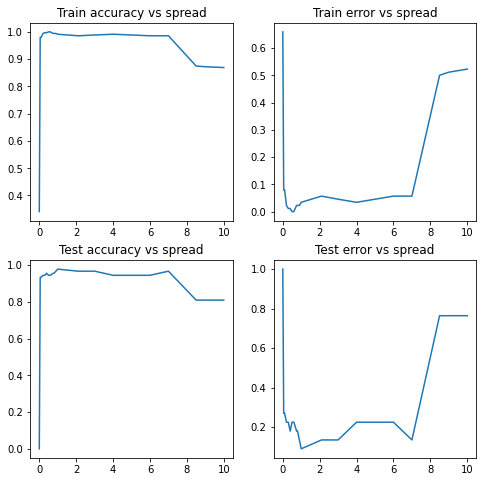

In [18]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.title.set_text('Train accuracy vs spread')
ax2.title.set_text('Train error vs spread')
ax3.title.set_text('Test accuracy vs spread')
ax4.title.set_text('Test error vs spread')
ax1.plot(spread, train_accuracies)
ax2.plot(spread, train_errors)
ax3.plot(spread, test_accuracies)
ax4.plot(spread, test_errors)
plt.show()

## Using K-Means to find the centers

In [19]:
kmeans = KMeans(n_clusters=150, random_state=81).fit(X_train)
# print(kmeans.cluster_centers_)

In [20]:
select_center(kmeans.cluster_centers_, spread, 150)

Spread: 0.001 
 Train accuracy: 0.09943181818181818 Train error: 0.9005681818181818 
 Test accuracy: 0.0 Test error: 1.0
Spread: 0.05 
 Train accuracy: 0.9772727272727273 Train error: 0.09090909090909091 
 Test accuracy: 0.9213483146067416 Test error: 0.3146067415730337
Spread: 0.1 
 Train accuracy: 0.9829545454545454 Train error: 0.06818181818181818 
 Test accuracy: 0.9325842696629213 Test error: 0.2696629213483146
Spread: 0.2 
 Train accuracy: 0.9971590909090909 Train error: 0.011363636363636364 
 Test accuracy: 0.9438202247191011 Test error: 0.2247191011235955
Spread: 0.3 
 Train accuracy: 1.0 Train error: 0.0 
 Test accuracy: 0.9438202247191011 Test error: 0.2247191011235955
Spread: 0.4 
 Train accuracy: 0.9971590909090909 Train error: 0.011363636363636364 
 Test accuracy: 0.9438202247191011 Test error: 0.2247191011235955
Spread: 0.5 
 Train accuracy: 0.9971590909090909 Train error: 0.011363636363636364 
 Test accuracy: 0.9550561797752809 Test error: 0.1797752808988764
Spread: 0.6 

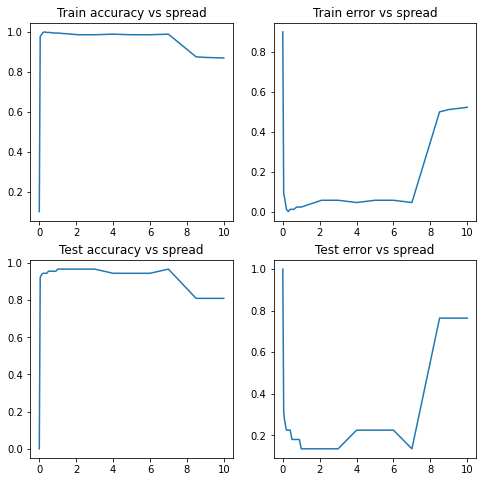

In [21]:
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.title.set_text('Train accuracy vs spread')
ax2.title.set_text('Train error vs spread')
ax3.title.set_text('Test accuracy vs spread')
ax4.title.set_text('Test error vs spread')
ax1.plot(spread, train_accuracies)
ax2.plot(spread, train_errors)
ax3.plot(spread, test_accuracies)
ax4.plot(spread, test_errors)
plt.show()

* Unlike the observations in the first part, training accuracy increases exponentially as the spread parameter is increased. However, for the last two widths of 8 and 10, the accuracy goes down to around 80%.
* The test accuracy graph is almost similar to the one in the first part. Furthermore, it is noteworthy to note that there are many irregularities in the accuracy between 0 and 2 in the first approach where all the points were considered as centers. The transition was rather smooth when 150 random clusters were choosen. The irregularity was least in case of KMeans.
* One of the main causes can be attributed to the fact that KMeans renders a head-start in finding of optimal clusters and is better able to adapt to the newer examples and generalize clusters better than the other two approaches.

**References**:
* https://github.com/ArijusGrotuzas/GaussianProcess/blob/main/rbf.py
* https://towardsdatascience.com/most-effective-way-to-implement-radial-basis-function-neural-network-for-classification-problem-33c467803319
* https://pythonmachinelearning.pro/using-neural-networks-for-regression-radial-basis-function-networks/